In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,r2_score
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_nyc = pd.read_csv('C:/DataMngtBigData/nyc-rolling-sales.csv')
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/2017 0:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00


In [3]:
df_nyc.drop(['Unnamed: 0'],axis=1,inplace=True)
df_nyc.drop(['EASE-MENT'],axis=1,inplace=True)

df_nyc.shape

(84548, 20)

In [4]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GROSS SQUARE FEET                 84548 non-null object
YEAR BUILT                        84548 non-null int64
TAX

In [5]:
sum(df_nyc.duplicated(df_nyc.columns))

765

In [6]:
df_nyc = df_nyc.drop_duplicates(df_nyc.columns, keep='last')
sum(df_nyc.duplicated(df_nyc.columns))

0

In [7]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
BOROUGH                           83783 non-null int64
NEIGHBORHOOD                      83783 non-null object
BUILDING CLASS CATEGORY           83783 non-null object
TAX CLASS AT PRESENT              83783 non-null object
BLOCK                             83783 non-null int64
LOT                               83783 non-null int64
BUILDING CLASS AT PRESENT         83783 non-null object
ADDRESS                           83783 non-null object
APARTMENT NUMBER                  83783 non-null object
ZIP CODE                          83783 non-null int64
RESIDENTIAL UNITS                 83783 non-null int64
COMMERCIAL UNITS                  83783 non-null int64
TOTAL UNITS                       83783 non-null int64
LAND SQUARE FEET                  83783 non-null object
GROSS SQUARE FEET                 83783 non-null object
YEAR BUILT                        83783 non-null int64
TAX

In [8]:
df_nyc['TAX CLASS AT TIME OF SALE'] = df_nyc['TAX CLASS AT TIME OF SALE'].astype('category')
df_nyc['TAX CLASS AT PRESENT'] = df_nyc['TAX CLASS AT PRESENT'].astype('category')
df_nyc['LAND SQUARE FEET'] = pd.to_numeric(df_nyc['LAND SQUARE FEET'], errors='coerce')
df_nyc['GROSS SQUARE FEET']= pd.to_numeric(df_nyc['GROSS SQUARE FEET'], errors='coerce')
df_nyc['SALE PRICE'] = pd.to_numeric(df_nyc['SALE PRICE'], errors='coerce')
df_nyc['BOROUGH'] = df_nyc['BOROUGH'].astype('category')
df_nyc['SALE DATE'] = pd.to_datetime(df_nyc['SALE DATE'],errors='coerce')

In [9]:
df_nyc['SALE PRICE']=df_nyc['SALE PRICE'].fillna(df_nyc['SALE PRICE'].mean())
df_nyc['LAND SQUARE FEET']=df_nyc['LAND SQUARE FEET'].fillna(df_nyc['LAND SQUARE FEET'].mean())
df_nyc['GROSS SQUARE FEET']=df_nyc['GROSS SQUARE FEET'].fillna(df_nyc['GROSS SQUARE FEET'].mean())
df_nyc.shape

(83783, 20)

In [10]:
sum(df_nyc.isnull().any())

0

In [11]:
df_nyc.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,1.280703e+06,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,1.280703e+06,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,,10009,20,0,20,2581.0,9730.0,1900,2,C4,1.280703e+06,2017-07-20
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3.192840e+06,2016-09-23
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,,10009,44,2,46,5163.0,21007.0,1900,2,C7,1.280703e+06,2017-07-20
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,,10009,15,0,15,1534.0,9198.0,1920,2,D5,1.280703e+06,2017-06-20
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,1.623200e+07,2016-11-07


In [12]:
df_nyc.shape

(83783, 20)

In [13]:
df_nyc=df_nyc.rename(columns={"SALE PRICE": "SALE_PRICE"})

s = df_nyc['SALE_PRICE']
df_nyc.drop(['SALE_PRICE'],axis=1,inplace=True)
df_nyc.insert(19,'SALE_PRICE',s)

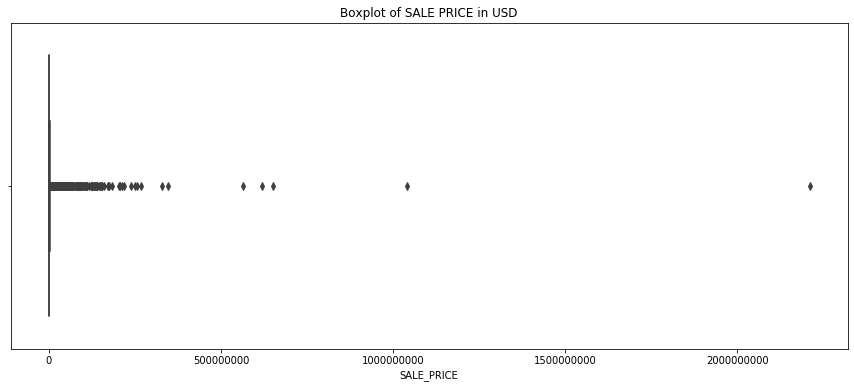

In [14]:
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE_PRICE', data=df_nyc)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [15]:
df_nyc = df_nyc[(df_nyc['SALE_PRICE'] > 100000) & (df_nyc['SALE_PRICE'] < 5000000)]
len(df_nyc)

68755

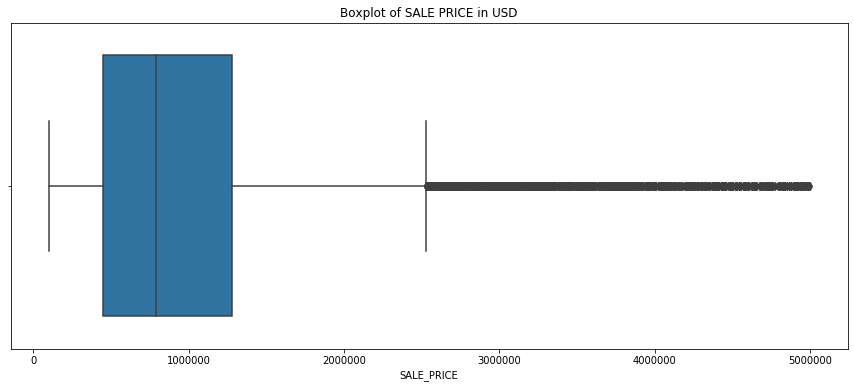

In [16]:
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE_PRICE', data=df_nyc)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [17]:
df_nyc.shape

(68755, 20)

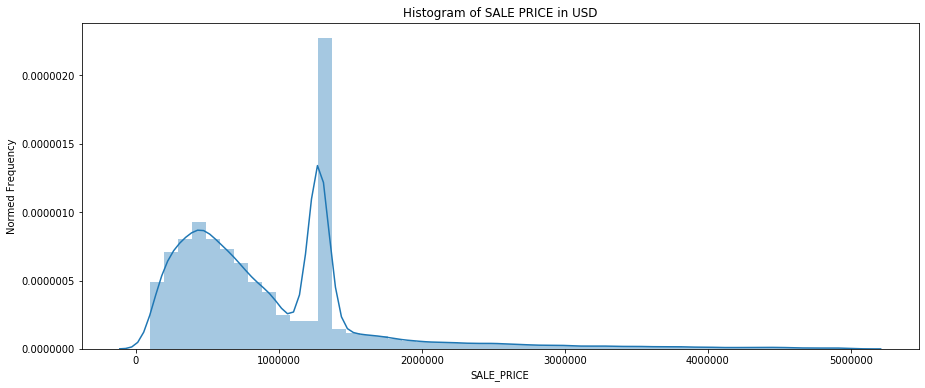

In [18]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(df_nyc['SALE_PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

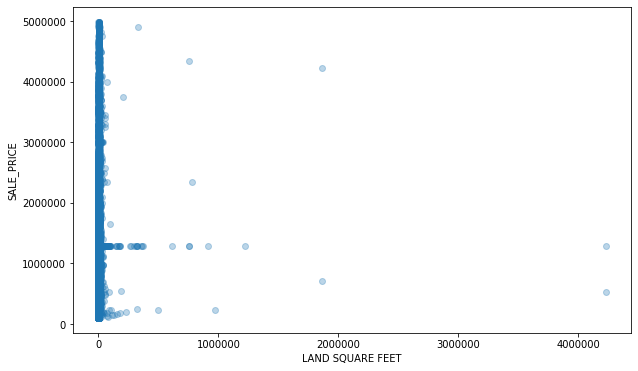

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE_PRICE', data=df_nyc, fit_reg=False, scatter_kws={'alpha':0.3})

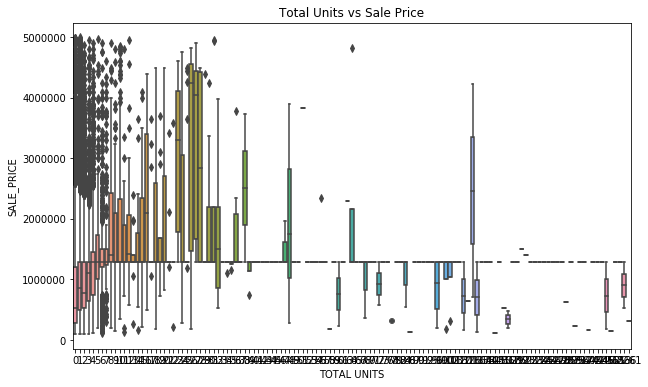

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TOTAL UNITS', y='SALE_PRICE', data=df_nyc)
plt.title('Total Units vs Sale Price')
plt.show()

In [21]:
numeric_data=df_nyc.select_dtypes(include=[np.number])
numeric_data.head()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE_PRICE
1,399,26,10009,28,3,31,4616.0,18690.0,1900,1.280703e+06
2,399,39,10009,16,1,17,2212.0,7803.0,1900,1.280703e+06
3,402,21,10009,10,0,10,2272.0,6794.0,1913,3.936272e+06
5,405,16,10009,20,0,20,2581.0,9730.0,1900,1.280703e+06
6,406,32,10009,8,0,8,1750.0,4226.0,1920,3.192840e+06


In [22]:
df_model=df_nyc.copy(deep=True)


In [23]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(df_model[numeric_data.columns])
scalar = scalar.transform(df_model[numeric_data.columns])
for i, col in enumerate(numeric_data.columns):
       df_model[col] = scalar[:,i]
df_model.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE_PRICE
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,-1.049863,-0.536075,C7,234 EAST 4TH STREET,,-0.593532,1.903324,0.314921,1.754211,0.038295,0.606671,0.187488,2,C7,2016-12-14,0.461542
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,-1.049863,-0.516563,C7,197 EAST 3RD STREET,,-0.593532,1.040713,0.094928,0.916579,-0.049941,0.179453,0.187488,2,C7,2016-12-09,0.461542
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.049054,-0.543580,C4,154 EAST 7TH STREET,,-0.593532,0.609407,-0.015069,0.497763,-0.047739,0.139859,0.212563,2,C4,2016-09-23,4.196197
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,-1.048245,-0.551084,C4,516 EAST 12TH STREET,,-0.593532,1.328250,-0.015069,1.096072,-0.036398,0.255070,0.187488,2,C4,2017-07-20,0.461542
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.047976,-0.527070,C4,210 AVENUE B,,-0.593532,0.465638,-0.015069,0.378102,-0.066899,0.039088,0.226065,2,C4,2016-09-23,3.150672


In [24]:
df_model.drop(['BUILDING CLASS AT PRESENT'],axis=1,inplace=True)
df_model.drop(['BUILDING CLASS AT TIME OF SALE'],axis=1,inplace=True)
df_model.drop(['NEIGHBORHOOD'],axis=1,inplace=True)
df_model.drop(['ADDRESS'],axis=1,inplace=True)
df_model.drop(['APARTMENT NUMBER'],axis=1,inplace=True)
df_model.drop(['SALE DATE'],axis=1,inplace=True)

In [25]:
df_model.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE_PRICE
1,1,07 RENTALS - WALKUP APARTMENTS,2,-1.049863,-0.536075,-0.593532,1.903324,0.314921,1.754211,0.038295,0.606671,0.187488,2,0.461542
2,1,07 RENTALS - WALKUP APARTMENTS,2,-1.049863,-0.516563,-0.593532,1.040713,0.094928,0.916579,-0.049941,0.179453,0.187488,2,0.461542
3,1,07 RENTALS - WALKUP APARTMENTS,2B,-1.049054,-0.543580,-0.593532,0.609407,-0.015069,0.497763,-0.047739,0.139859,0.212563,2,4.196197
5,1,07 RENTALS - WALKUP APARTMENTS,2,-1.048245,-0.551084,-0.593532,1.328250,-0.015069,1.096072,-0.036398,0.255070,0.187488,2,0.461542
6,1,07 RENTALS - WALKUP APARTMENTS,2B,-1.047976,-0.527070,-0.593532,0.465638,-0.015069,0.378102,-0.066899,0.039088,0.226065,2,3.150672


In [26]:
one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']
one_hot_encoded = pd.get_dummies(df_model[one_hot_features])
# Replacing categorical columns with dummies
fdf = df_model.drop(one_hot_features,axis=1)
fdf = pd.concat([fdf, one_hot_encoded] ,axis=1)


In [27]:
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68755 entries, 1 to 84545
Data columns (total 66 columns):
BOROUGH_1                                                               68755 non-null uint8
BOROUGH_2                                                               68755 non-null uint8
BOROUGH_3                                                               68755 non-null uint8
BOROUGH_4                                                               68755 non-null uint8
BOROUGH_5                                                               68755 non-null uint8
BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                         68755 non-null uint8
BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                         68755 non-null uint8
BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                       68755 non-null uint8
BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                           68755 non-null uint8
BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND    

In [28]:
y = fdf['SALE_PRICE']
X = fdf.drop('SALE_PRICE', axis=1)

X.shape , y.shape

((68755, 75), (68755,))

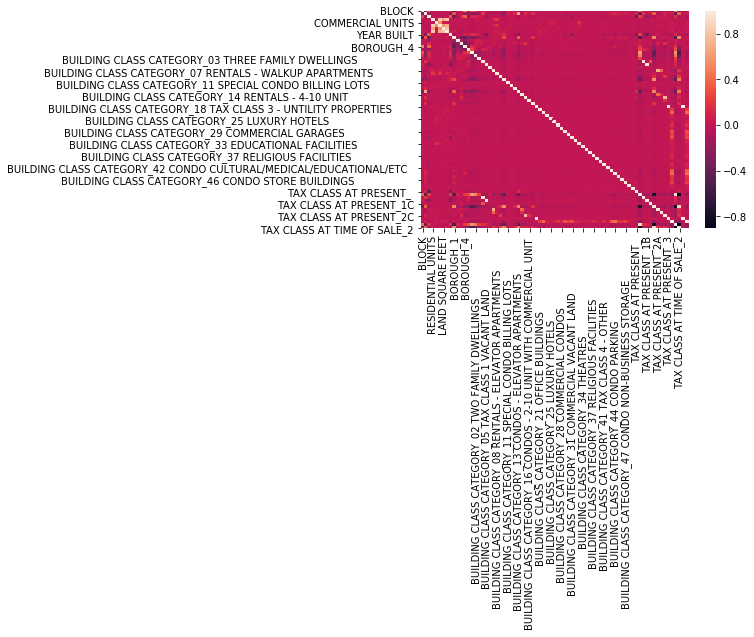

In [29]:
corr = X.corr()
sns.heatmap(corr)

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =42)
X_train.shape , y_train.shape

((51566, 75), (51566,))

In [31]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [32]:
from sklearn.linear_model import LinearRegression 
linreg = LinearRegression()
linreg.fit(X_train, y_train)
Y_pred_lin = linreg.predict(X_test)

accuracy = round(linreg.score(X_train, y_train) *100,2)
print(accuracy)
rmse(y_test,Y_pred_lin)

28.1


0.843249095346543

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, y_train)
Y_pred_rf = rf_regr.predict(X_test)
accuracy = round(rf_regr.score(X_train, y_train) *100,2)
print(accuracy)
rmse(y_test,Y_pred_rf)

86.58


0.7103948289717471

In [ ]:
from sklearn import svm
SVR_reg = svm.SVR().fit(X_train,y_train)
y_pred_svr = SVR_reg.predict(X_test)
accuracy = round(SVR_reg.score(X_train, y_train) *100,2)
print(accuracy)
rmse(y_test,y_pred_svr)

In [32]:
#XGBOOST
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

r2_score_xgboost = round(r2_score(y_test, preds),3)
accuracy = round(xg_reg.score(X_train, y_train) *100,2)
print(accuracy)
rmse(y_test,preds)

[18:42:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
41.84


0.7562007488152194